<a href="https://colab.research.google.com/github/proteenteen/Artificial-intelligence-AI-/blob/main/AI_week3_ControlDcServo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-901babd140fd>:60: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-5-901babd140fd>:61: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=10,cmap='viridis',anpha=0.5)
<ipython-input-5-901babd140fd>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


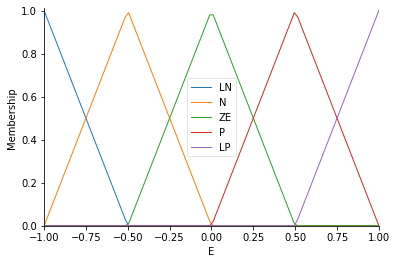

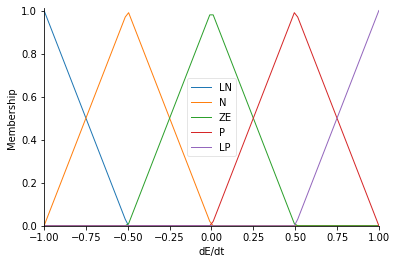

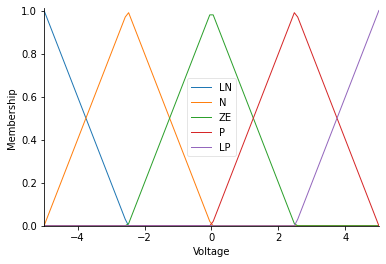

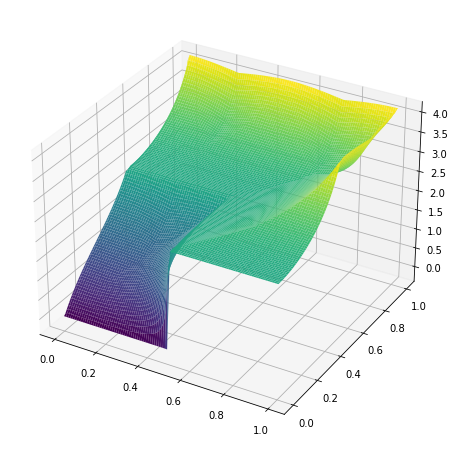

In [5]:
from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math 

universe = np.linspace(-1,1,100)
universe1 = np.linspace(-1,1,100)
universe2 = np.linspace(-5,5,100)

e = ctrl.Antecedent(universe,'E')
de = ctrl.Antecedent(universe1,'dE/dt')
vol = ctrl.Consequent(universe2,'Voltage')

names=['LN','N','ZE','P','LP']

e.automf(names=names)
de.automf(names=names)
vol.automf(names=names)

e.view()
de.view()
vol.view()

rule1=ctrl.Rule(antecedent=((e['LN']&de['LN'])|(e['LN']&de['N'])|(e['ZE']&de['N'])
                            |(e['P']&de['LN'])),consequent=vol['LN'],label='Rule LN')

rule2=ctrl.Rule(antecedent=((e['LN']&de['ZE'])|(e['LN']&de['P'])|(e['LP']&de['LN'])
                            |(e['N']&de['N'])|(e['N']&de['LN'])|(e['N']&de['ZE'])|(e['N']&de['P'])),consequent=vol['N'],label='Rule N')

rule3=ctrl.Rule(antecedent=((e['N']&de['LP'])|(e['ZE']&de['ZE'])),consequent=vol['ZE'],label='Rule ZE')

rule4=ctrl.Rule(antecedent=((e['ZE']&de['P'])|(e['P']&de['P'])|(e['LP']&de['LN'])
                            |(e['LP']&de['N'])|(e['LP']&de['ZE'])),consequent=vol['P'],label='Rule P')

rule5=ctrl.Rule(antecedent=((e['ZE']&de['LP'])|(e['P']&de['LP'])|(e['P']&de['LP'])
                            |(e['LP']&de['P'])|(e['LP']&de['LP'])),consequent=vol['LP'],label='Rule LP')


vol_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim= ctrl.ControlSystemSimulation(vol_ctrl,flush_after_run=100*100+1)

upsampled = np.linspace(0,1,100)
upsampled1 = np.linspace(0,1,100)
x,y, = np.meshgrid(upsampled,upsampled1)
z = np.zeros_like(x)

for i in range(100):
  for j in range(100):
    sim.input['E']=x[i,j]
    sim.input ['dE/dt']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['Voltage']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)